In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Datasets
gender_submission = "gender_submission.csv"
test= "test.csv"
train = 'train.csv'

In [3]:
# Read the CSV files into a pandas DataFrame
gender_sub= pd.read_csv(gender_submission)
test= pd.read_csv(test)
train= pd.read_csv(train)


In [4]:
### DATA EXPLORATION
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Basic Stats
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Data Cleaning 
# Checking for nulls in the train dataset
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
##There are 687 null values in the cabin column of the train data, 177 in the Age column, and 2 in Embarked

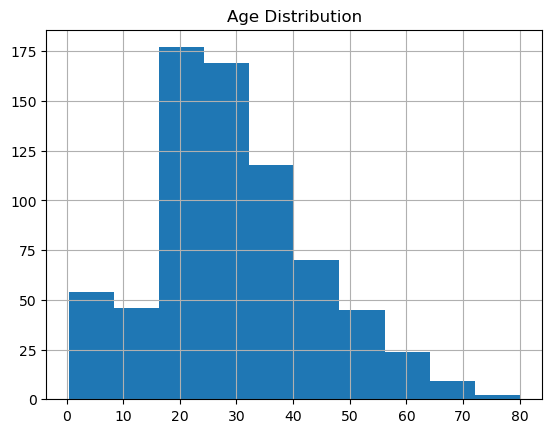

In [9]:
#Checking Age Distribution
age_dist= train['Age']
age_dist.hist(bins=10)
plt.title('Age Distribution')
plt.show()

In [10]:
#Distribution INterpretation.
#About20% of all passengers on board fell between the ages of 20 and 30

In [11]:
#Data Cleaning
#Replacing nulls in Age column with the average age
age_mean = train['Age'].mean()
print(age_mean)

29.69911764705882


In [12]:
train['Age'].fillna(age_mean, inplace=True)


In [13]:
#Replace nulls in Embarked with the most frequent Embarked location using the mode function
mode_emb= train['Embarked'].mode()[0]
train['Embarked'].fillna(mode_emb, inplace=True)

In [14]:
#Data ANalysis

In [15]:
#1. How many passengers survived and how many died?
survival_counts = train['Survived'].value_counts()
print("Number of passengers who survived:", survival_counts[1])
print("Number of passengers who died:", survival_counts[0])


Number of passengers who survived: 342
Number of passengers who died: 549


In [16]:
#2. Rate of survival
survival_rate = train['Survived'].value_counts(normalize=True)
print('Percentage of those who survived:', survival_rate[1]*100, '%')
print('Percentage of those who survived:', survival_rate[0]*100, '%')

Percentage of those who survived: 38.38383838383838 %
Percentage of those who survived: 61.61616161616161 %


In [17]:
#3. Understanding Survival count by each feature
#BY SEX
surv_sex= train.groupby(['Sex', 'Survived']).agg({'Survived':'count'}).unstack()
print(surv_sex)

         Survived     
Survived        0    1
Sex                   
female         81  233
male          468  109


In [18]:
print('The survival rate of women is clearly higher than that of mean')

The survival rate of women is clearly higher than that of mean


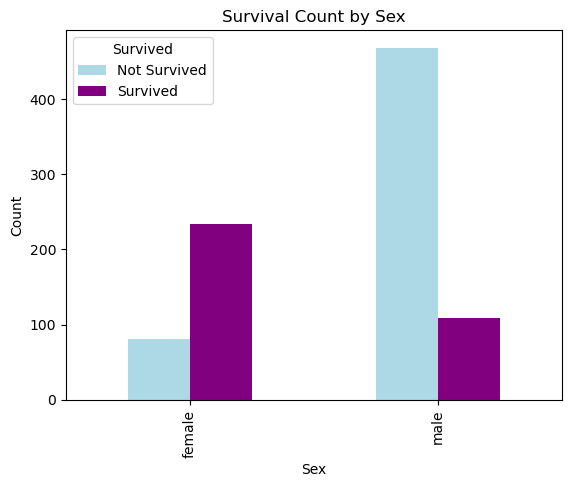

In [19]:
# Custom color palette for survival (1: purple) and non-survival (0: blue)
custom_palette = {0: '#ADD8E6', 1: 'purple'}

# Plot the data using a bar plot
surv_sex.plot(kind='bar', color=[custom_palette[i[1]] for i in surv_sex.columns])

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

In [20]:
#What % of women really survived?
females= train[train['Sex']=='female']
fem_surv=females['Survived'].value_counts(normalize=True)
print('Percentage of women who survived:', fem_surv[1]*100, '%')

Percentage of women who survived: 74.20382165605095 %


In [21]:
#What % of men really survived?
males= train[train['Sex']=='male']
male_surv= males['Survived'].value_counts(normalize=True)
print('Percentage of men who survived:', male_surv[1]*100, '%')

Percentage of men who survived: 18.890814558058924 %


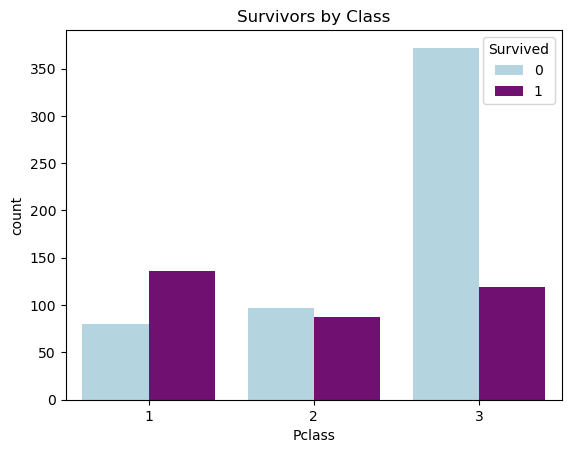

In [22]:
#FEATURE 2- By Class
#What's the survival rate by class

# Custom color palette for survival (1: purple) and non-survival (0: blue)
custom_palette = {0: '#ADD8E6', 1: 'purple'}

sns.countplot(x='Pclass', hue='Survived', data=train, palette= custom_palette)
plt.title('Survivors by Class')
plt.show()

In [23]:
#Class 1 survival rate
class_1= train[train['Pclass']==1]
class_1_surv= class_1['Survived'].value_counts(normalize=True)
print('The survival rate for Class 1 is:', class_1_surv[1]*100)

The survival rate for Class 1 is: 62.96296296296296


In [24]:
#Class 2 survival rate
class_2= train[train['Pclass']==2]
class_2_Surv= class_2['Survived'].value_counts(normalize=True)
print('The Survival rate for class 2 is:', class_2_Surv[1]*100)

The Survival rate for class 2 is: 47.28260869565217


In [25]:
#Class 3 survival rate
class_3= train[train['Pclass']==3]
class_3_surv= class_3['Survived'].value_counts(normalize=True)
print('The Survival rate for class 3 is:', class_3_surv[1]*100)

The Survival rate for class 3 is: 24.236252545824847


In [26]:
#It is evident that passengers in class 1 were given a lot more priority during rescue, as 63% of passengers from that class 
#rescued. The class with the lowest survival rate was class 3 with 24% survival rate. Money does buy almost anything, eii/:)

In [27]:
#FEATURE 3- By Family Size
#To get the family size, we need to sum the values of Number of siblings & Num of Parents for every observation
#to create a new column 
train['combined_fam']=train['SibSp']+train['Parch']+1
train['Is_alone']= (train['combined_fam']==1).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,combined_fam,Is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [28]:
#Counting no of survivors by Family size
#Survival by Combined_family greater than 1
fam_sub=train[train['combined_fam']>1]
fam_sub['Survived'].value_counts(normalize=True)

1    0.50565
0    0.49435
Name: Survived, dtype: float64

In [29]:
#50% of those who came with their families survived

In [30]:
#Survival rate by Is_alone
Is_alone= train[train['Is_alone']==1]
Is_alone['Survived'].value_counts(normalize=True)

0    0.696462
1    0.303538
Name: Survived, dtype: float64

In [31]:
#69% of those who came alone survived. Data shows that there was a greater chance of survival if people came onbaord alone
#as against coming with an extra family member

In [32]:
#COMBINING FEATURES to see which has greater survival rate
#Combine Sex with Pclass and Survival
pivot=train.pivot_table(values='Survived', index='Sex', columns='Pclass')
print(pivot)

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


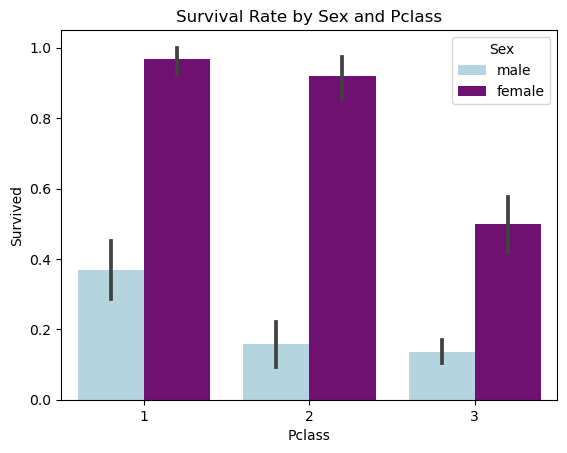

In [33]:
# Factor Plot
# Custom color palette for survival (1: purple) and non-survival (0: blue)
custom_palette = {'male': '#ADD8E6', 'female': 'purple'}

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, palette=custom_palette)
plt.title('Survival Rate by Sex and Pclass')
plt.show()


In [34]:
#Women in geeneral were given more priority when rescue was ongoing. Women from the Class 1 and 2 had the highest survival rate
#Women in class 1 had 96% survival rate, women in class 2 had 92% survival rate. Men in class 1 on the other hand  had 37% 
#survival rate

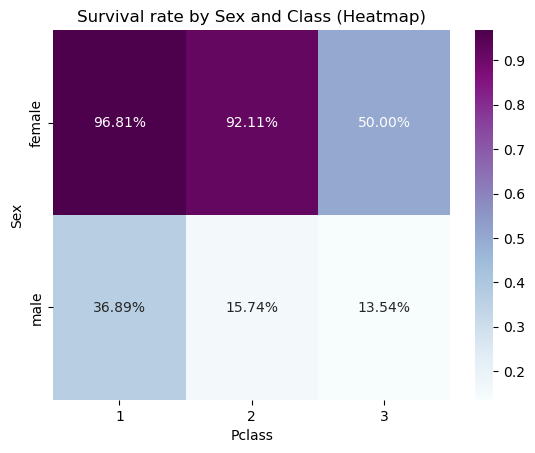

In [35]:
# Heatmap
sns.heatmap(pivot, annot=True, cmap='BuPu', fmt=".2%")
plt.title('Survival rate by Sex and Class (Heatmap)')
plt.show()

In [36]:
#FEATURE 4- Survival rate by Sex, Class and Age group
#Create Age bins
age_bins= [0, 18, 35, 50, 65, 100]
age_labels= ['0-18', '19-35', '36-50', '51-65', '65+']

#Create Age_group column
train['age_group']= pd.cut(train['Age'], age_bins, age_labels, include_lowest=True)

#Create pivot table
pivot= train.pivot_table(values='Survived', index=['Sex', 'Pclass'], columns='age_group')
print(pivot)

age_group      (-0.001, 18.0]  (18.0, 35.0]  (35.0, 50.0]  (50.0, 65.0]  \
Sex    Pclass                                                             
female 1             0.909091      0.977778      0.960000      1.000000   
       2             1.000000      0.928571      0.882353      0.666667   
       3             0.511628      0.546512      0.142857      1.000000   
male   1             0.800000      0.392157      0.400000      0.181818   
       2             0.600000      0.095238      0.055556      0.100000   
       3             0.215686      0.133065      0.076923      0.000000   

age_group      (65.0, 100.0]  
Sex    Pclass                 
female 1                 NaN  
       2                 NaN  
       3                 NaN  
male   1                0.25  
       2                0.00  
       3                0.00  


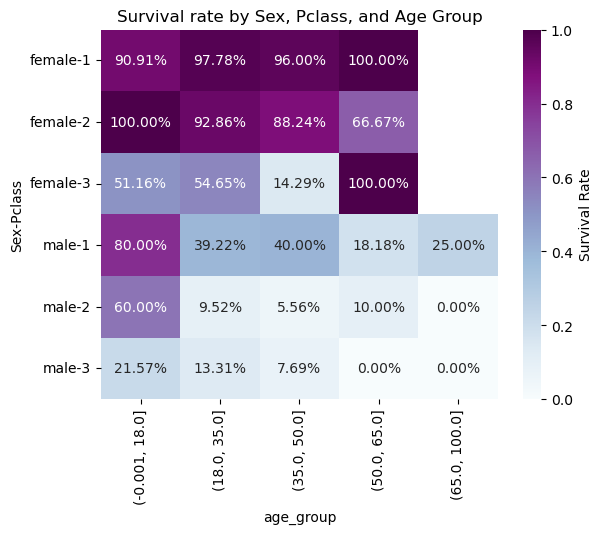

In [37]:
# Visualization using a heatmap
sns.heatmap(pivot, annot=True, cmap='BuPu', fmt=".2%", cbar_kws={'label': 'Survival Rate'})
plt.title('Survival rate by Sex, Pclass, and Age Group')
plt.show()

In [38]:
#Its evident that females in class 2 within the (0-18 yrs)age group all survived. females aged between 50-65 from class 1 and 3
#all survived too.


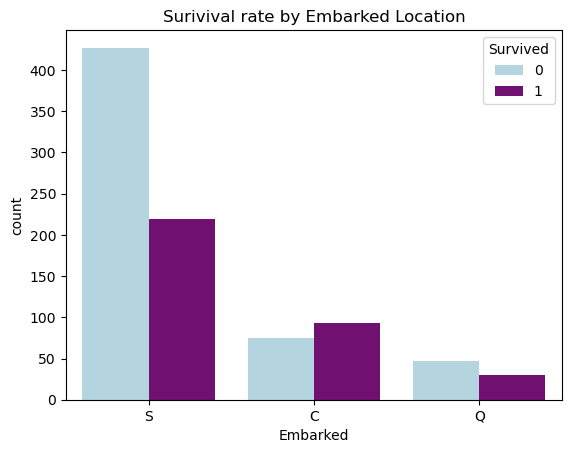

In [39]:
#Step 2
# Custom color palette for survival (1: purple) and non-survival (0: blue)
#Color palette
color_palette= {0: '#ADD8E6', 1: 'purple'}

# Set plot labels and title
sns.countplot(x='Embarked', hue='Survived', data= train, palette= color_palette)
plt.title('Surivival rate by Embarked Location')
plt.show()
                                



In [40]:
# Create a pivot table
embarked_pivot = train.pivot_table(values='Survived', index='Embarked', aggfunc='mean')*100

# Display the pivot table
print(embarked_pivot)


           Survived
Embarked           
C         55.357143
Q         38.961039
S         33.900929


In [41]:
#passengers who boarded from Cherbourg had greater rates of survival than those who boarded from Queenstown, and Southampton